# Introduction 2 AI, Kazak-British Technical University

## Seminar 2. Types of data and types of machine learning tasks

At the lecture, we discussed that the most common machine learning tasks are classification and regression. But life, as usual, is richer than a book, and for each data domain there are many specific tasks that are solved with varying degrees of success by specialists in the field of YOUTH.

In [1]:
!pip install torchaudio >> /dev/null

‘ЁбвҐ¬Ґ ­Ґ г¤ Ґвбп ­ ©вЁ гЄ § ­­л© Їгвм.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 18})
sns.set_style('whitegrid')

## Synthetic/geometric data

- We know exactly all the dependencies between the target variable and the attributes, since we set them ourselves
- Well suited for visualizing the work of algorithms

**Attention!** A sample of a good graphic design.

In [5]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.1, random_state=0)
y

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,

C:\Users\zhalgas.zhienbekov\AppData\Local\Temp\ipykernel_35112\2395548434.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  axs[1].figure.colorbar(sm, label='target')


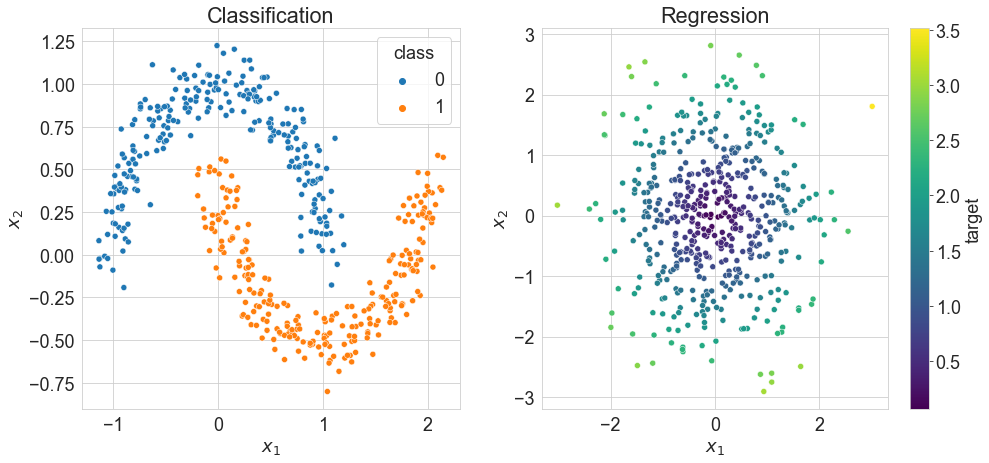

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1, random_state=0)
fig, axs = plt.subplots(figsize=(16, 7), nrows=1, ncols=2, gridspec_kw={'width_ratios': [1.75, 2]})
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axs[0])

X = np.random.randn(500, 2)
y = np.sqrt((X ** 2).sum(axis=1))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axs[1], palette='viridis')

axs[0].legend(title='class')
axs[0].set_title('Classification')

norm = plt.Normalize(y.min(), y.max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

axs[1].get_legend().remove()
axs[1].figure.colorbar(sm, label='target')
axs[1].set_title('Regression')

for ax in axs:
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

plt.show()

Examples of clustering on synthetic data: https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png

## Tabular data

Of course, we could take any data and present it as a table, but here we are talking about canonically tabular data, when all the features have a different nature and in some sense are separate, "meaningful" dimensions. 
- - This is one of the most common data types, and in the course of MO-1 90% of the time we will work with tables
- Usually signs are divided into real and categorical.

Boston dataset: http://lib.stat.cmu.edu/datasets/boston

In [4]:
from sklearn.datasets import load_boston

X = load_boston()
X = pd.DataFrame(data=np.concatenate((X['data'], X['target'].reshape(-1, 1)), axis=1),
                 columns=list(X['feature_names']) + ['target'])
X

C:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Images

The direction of machine learning that deals with images is called Computer Vision (CV). As a rule, images are represented as tensors of dimension $(H, W, C)$, where usually $C = 3$. The content of the tensor depends on the color space, RGB is most often used.

In [5]:
!wget -O image.jpg https://krasivosti.pro/uploads/posts/2021-06/1623727983_11-krasivosti_pro-p-milie-yezhiki-zhivotnie-krasivo-foto-11.jpg

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


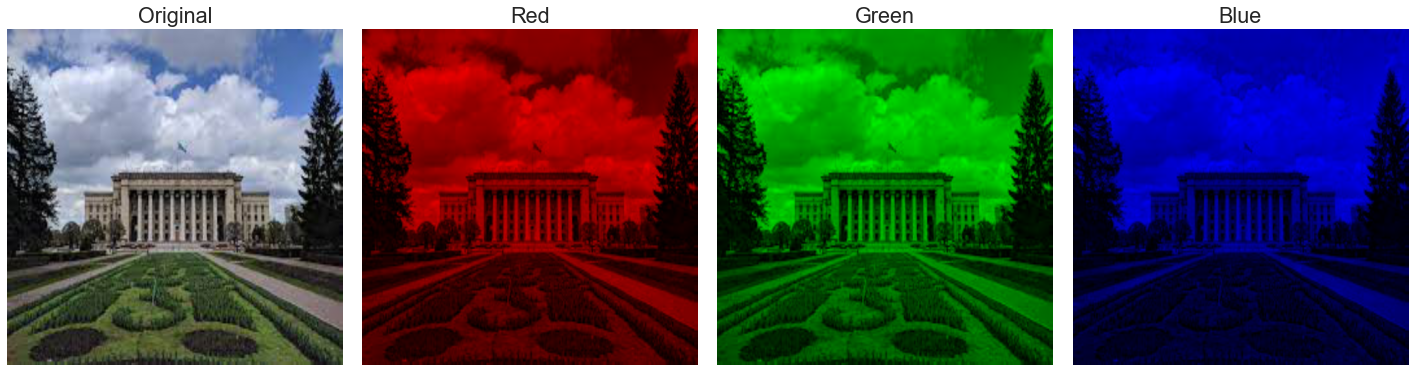

In [7]:
from skimage import io, color
from skimage.transform import resize

rgb_image = resize(io.imread('kbtu.jpg'), (512, 512))
fix, axs = plt.subplots(figsize=(20, 6), nrows=1, ncols=4)
axs[0].imshow(rgb_image)

red_image = np.copy(rgb_image)
red_image[..., 1:] = 0.0
axs[1].imshow(red_image)

green_image = np.copy(rgb_image)
green_image[..., [0, 2]] = 0.0
axs[2].imshow(green_image)

blue_image = np.copy(rgb_image)
blue_image[..., :2] = 0.0
axs[3].imshow(blue_image)

for ax in axs:
    ax.grid(False)
    ax.axis('off')

for ax, title in zip(axs, ['Original', 'Red', 'Green', 'Blue']):
    ax.set_title(title)

plt.tight_layout()
plt.show()

Sometimes other color spaces are also used, for example, Lab (a lightness channel and two color channels).

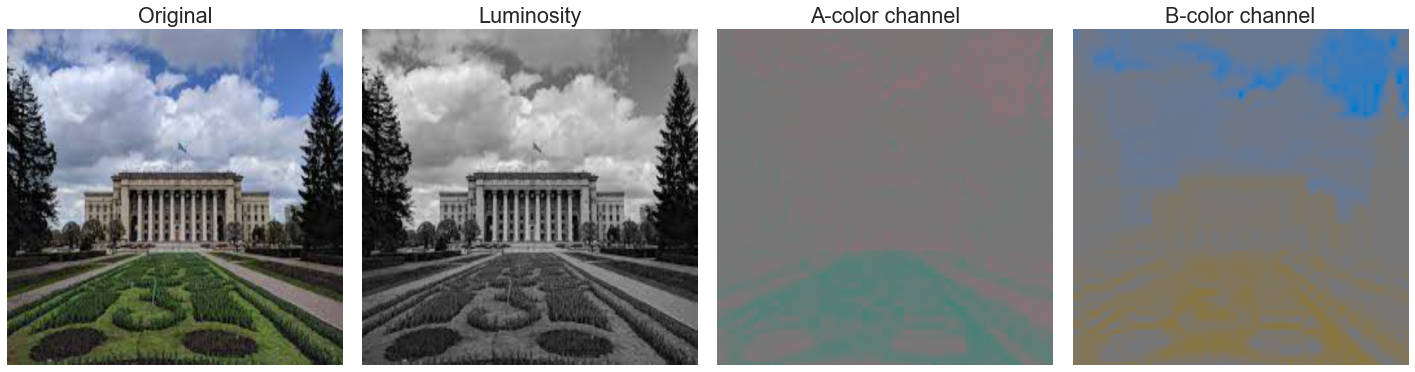

In [8]:
lab_image = color.rgb2lab(rgb_image)
fix, axs = plt.subplots(figsize=(20, 6), nrows=1, ncols=4)
axs[0].imshow(rgb_image)

l_image = np.copy(lab_image)
l_image[..., 1:] = 0.0
axs[1].imshow(color.lab2rgb(l_image))

a_image = np.copy(lab_image)
a_image[..., 0] = 50
a_image[..., 2] = 0
axs[2].imshow(color.lab2rgb(a_image))

b_image = np.copy(lab_image)
b_image[..., 0] = 50
b_image[..., 1] = 0
axs[3].imshow(color.lab2rgb(b_image))

for ax in axs:
    ax.grid(False)
    ax.axis('off')

for ax, title in zip(axs, ['Original', 'Luminosity', 'A-color channel', 'B-color channel']):
    ax.set_title(title)

plt.tight_layout()
plt.show()

### Tasks:

**Classification** (ImageNet, CIFAR-10/100, MNIST)


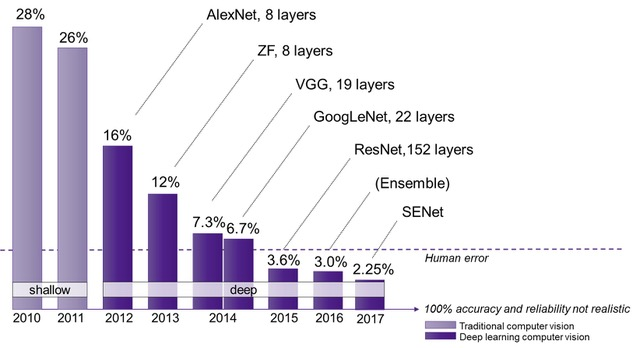

**Semantic segmentation** (PASCAL VOC, Cityscapes)


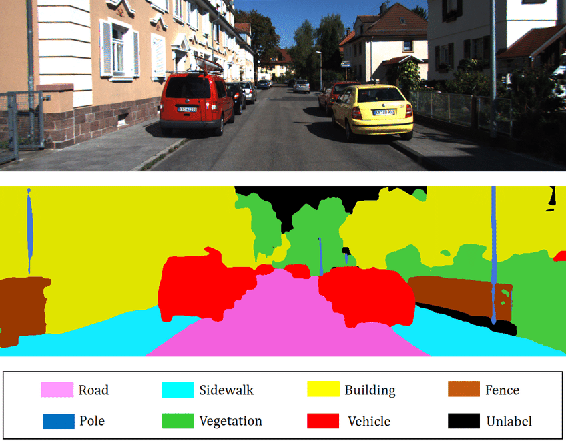

**object detection** (COCO, PASCAL VOC)


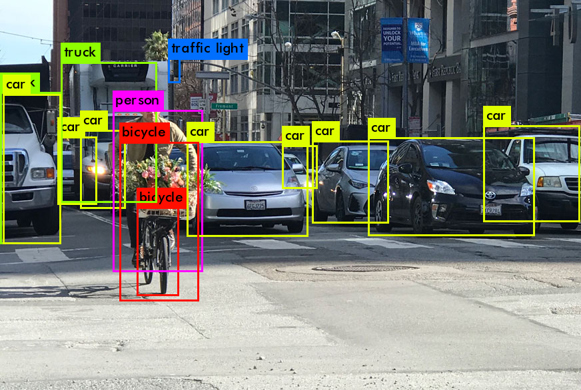

And many, many others, such as pose estimation, scene reconstruction, etc.

There are also various generative tasks, such as style transfer or resolution enhancement (super-resolution).


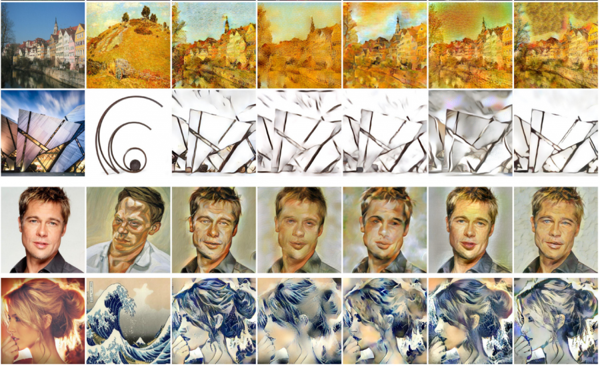

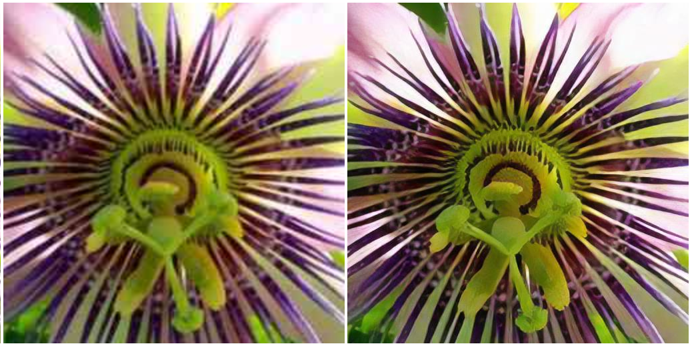

## Text data

Natural Language Processing (NLP) is one of the most popular areas in machine learning. Often methods from NLP migrate to other data domains and find successful application there. The main features of text data are, firstly, their discreteness, and secondly, the sequential structure. As a rule, when working with text, it is tokenized (by characters, by words, or by combinations of characters - the so-called byte-pair-encoding, BPE), and then each token is assigned some embedding vector. This transformation makes it possible to process discrete data with continuous models.

Recently, tools for working with data that are similar to texts, but are not, have also been developing. For example, new tasks and data related to the processing of program code appear.

## Tasks:

- **- **Machine translation (machine translation)** (MT, IWSLT)
- **Text Description (text summary)** (GigaWord, arXiv)
- **- **Language modeling** (Wikitext)
- **Generative technology (text generation)** (MATHEMATICS, COCO signatures)
- **- **Answers to questions (answers to questions)** (SQuAD, Wiki QA)
- **Definition of part of speech (marking parts of speech, POS)** (Penn Treebank)
- **Analysis of emotional coloring (sentiment analysis)** (SST, IMDb, Yelp)

## Audio

Audio recordings are often presented as a sequence of real numbers from the interval $[-1, 1]\,$ ( wav format). Such audio can be either single-channel or multi-channel. When working with music, the MIDI format is popular. But the most common spectrograms are the result of applying the Fourier transform or its variations to the sound wave.

In [11]:
import librosa
import torch
import torchaudio
from IPython.display import Audio

waveform, sample_rate = librosa.load(librosa.example('trumpet'))
waveform = torch.from_numpy(waveform)
Audio(waveform, rate=sample_rate)

ModuleNotFoundError: No module named 'torchaudio'

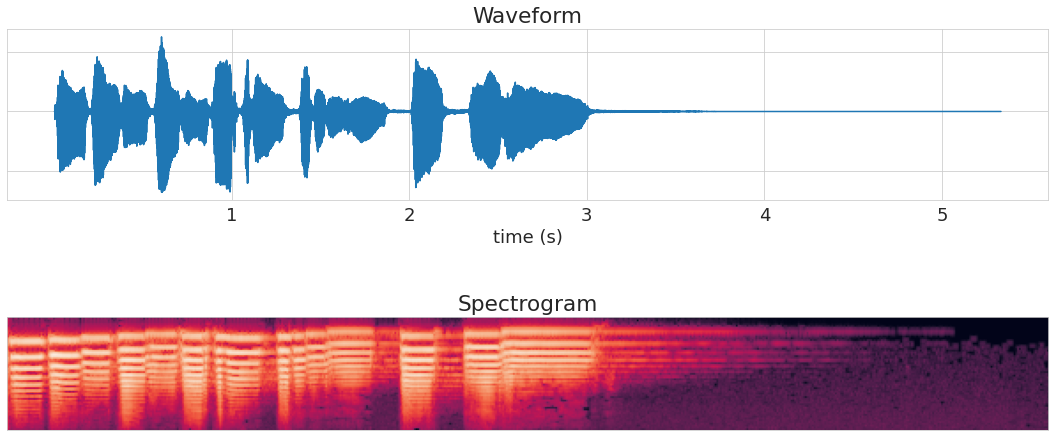

In [ ]:
spectrogramer = torchaudio.transforms.MelSpectrogram(n_mels=64, sample_rate=sample_rate)
spec = spectrogramer(waveform.unsqueeze(0)).squeeze(0)

fig, axs = plt.subplots(figsize=(15, 8), nrows=2, ncols=1, gridspec_kw={'height_ratios': [1, 2]})
axs[0].plot(waveform)
axs[1].imshow(torch.log(spec + 1e-9))

pos = (np.arange(1, 6, 1) * sample_rate).astype(int)
axs[0].set_xticks(pos)
axs[0].xaxis.set_ticklabels([str(i) for i in range(1, 6)])
axs[0].yaxis.set_ticklabels([])
axs[0].set_xlabel('time (s)')
axs[0].set_title('Waveform')
ф
axs[1].grid(False)
axs[1].xaxis.set_ticklabels([])
axs[1].yaxis.set_ticklabels([])
axs[1].set_title('Spectrogram')

plt.tight_layout()
plt.show()

### Tasks

- **- **Speech recognition (automatic speech recognition, asr, speech-to-text)** (LJSpeech, Libre Speech)
- **Speech synthesis (text-to-speech, tts)**
- **Music generation**
- **Noise reduction, speech enhancement (denoising, speech enhancement)**
- **Keyword recognition (keyword spotting, kws)**

## Video

Working with video files is similar to working with images: time is added to the 2 spatial dimensions of the dimension of the color channels. Sometimes the audio track is also considered in the context of the video. In general, all the same tasks are relevant for videos as for images, adjusted for the presence of changes in the scene over time. Among the specific tasks, we can mention **optical flow** (tracking the movement of pixels on frames) and **object tracking** (tracking moving objects).

In [10]:
from IPython.display import Image
Image(url='https://nanonets.com/blog/content/images/2019/04/sparse-vs-dense.gif')

## Graph data

Sometimes data has an explicit or implicit graph structure (for example, molecules as graphs of atoms or profiles in social networks), and it would be useful to use this additional knowledge when processing. Graph problems can be divided into two types:

1. Tasks at the vertex level (for example, defining a social role)
2. Graph-level tasks (e.g. classification of molecules)

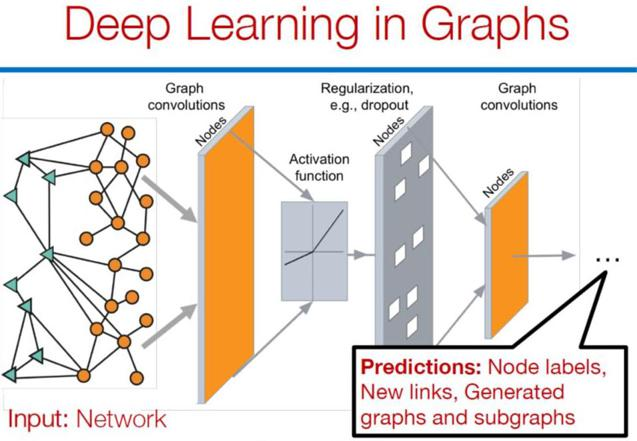

## Multi-domain tasks

The improvement of machine learning models and the growth of computing power have led to the emergence of tasks affecting several data domains. Let's recall the tasks of sound processing: speech recognition and synthesis, in fact, are a translation from the sound domain to the text domain and vice versa. There are examples of combining text and images: this is Visual Question Answering (VQA) -- answers to questions by image or text-to-image generation -- image generation by text query. Such tasks are solved using very large and complex models, and also require a huge amount of data and a computing budget. Here you can also recall about drones, which also process data of a very different nature.